 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_portfolio_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_portfolio_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_portfolio_df.isnull().sum() # using the sum method is an easier and more accurate way to look at null values!

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_portfolio_df = whale_portfolio_df.dropna()
whale_portfolio_df.isnull().sum() # to confirm that the null values are dropped!

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algorithmic_path = Path("Resources/algo_returns.csv") 
algorithmic_dr_df= pd.read_csv(algorithmic_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algorithmic_dr_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algorithmic_dr_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algorithmic_dr_df = algorithmic_dr_df.dropna()
algorithmic_dr_df #to check that the null values are being dropped!

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
spy_path = Path("Resources/sp500_history.csv")
spy_df = pd.read_csv(spy_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
spy_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [9]:
# Check Data Types
spy_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
spy_df["Close"] = spy_df["Close"].str.replace("$", "").astype("float")
spy_df.sort_index(inplace=True)
spy_df #to confirm that the $ sign is being replaced by an empty string ""

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
# Calculate Daily Returns: 

# To do so we need to convert strings into integers (we turned the closed column into int earlier to remove the $ sign)!

spy_df["Close"] = pd.to_numeric(spy_df["Close"])

#Now we can calculate the daily return by using the .pct method:
spy_daily_return = spy_df.pct_change()
spy_daily_return.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls:

spy_daily_returns = spy_daily_return.dropna()
spy_daily_returns.head() 

#in the results we see that the first row NaN is being dropped. 
# The reason why the first row is NaN is because on the daily returns formula 
# there is no previous number to subtrack.


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
spy_daily_returns.columns = spy_daily_returns.columns.str.replace("Close", "S&P500 Daily Returns")
spy_daily_returns.head()


,S&P500 Daily Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
conc_portofolios_returns = pd.concat([whale_portfolio_df, algorithmic_dr_df, spy_daily_returns], axis="columns", join="inner")
conc_portofolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Return of all portfolios'}, xlabel='Date'>

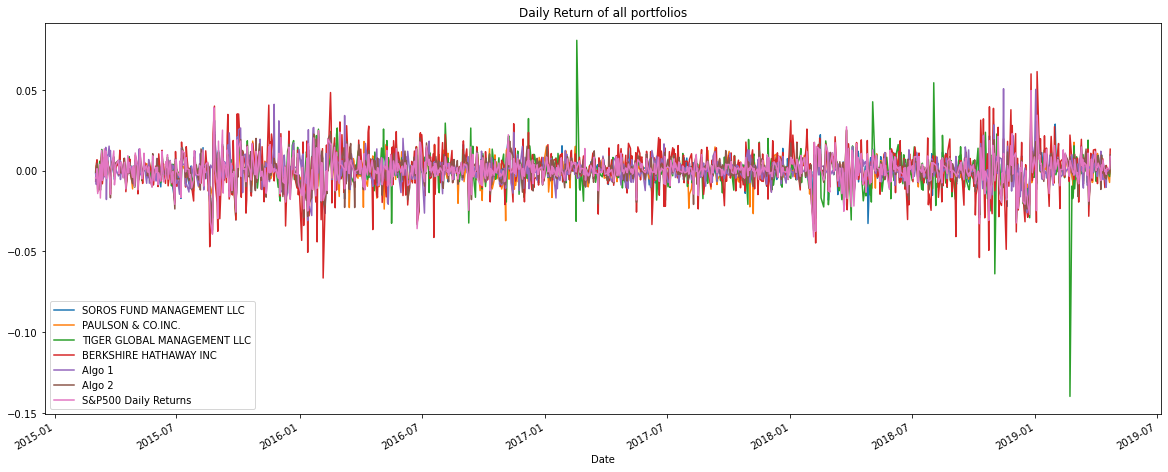

In [15]:
# Plot daily returns of all portfolios
conc_portofolios_returns.plot(title = "Daily Return of all portfolios", figsize=(20,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Return of all portfolios'}, xlabel='Date'>

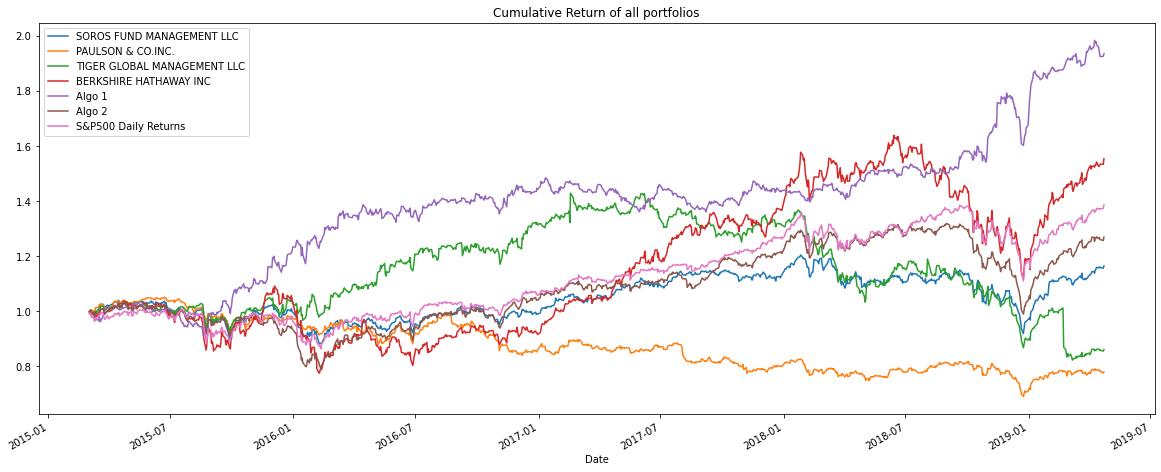

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_return = (1 + conc_portofolios_returns).cumprod()
cumulative_return.head()

# Plot cumulative returns
cumulative_return.plot(title= "Cumulative Return of all portfolios", figsize=(20,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns of all portfolios in BoxPlot to show the Risk'}>

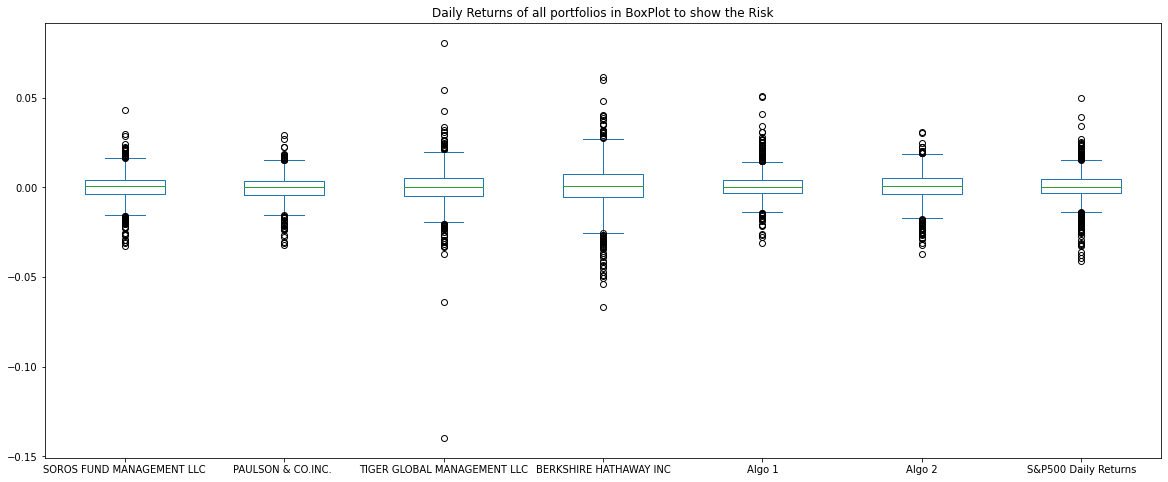

In [17]:
# Box plot to visually show risk
conc_portofolios_returns.plot(title= "Daily Returns of all portfolios in BoxPlot to show the Risk", kind = "box", figsize = (20,8))

#from boxplot we are able to understand that the riskier portfolios is the Tiger Global Management Portfolio 

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_standard_deviation = pd.DataFrame(conc_portofolios_returns.std()).rename(columns={0:"Standard Deviation"})
daily_standard_deviation

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P500 Daily Returns,0.008554


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
greater_std_than_spy = daily_standard_deviation[daily_standard_deviation["Standard Deviation"] > daily_standard_deviation.loc["S&P500 Daily Returns", "Standard Deviation"]]

# Determine which portfolios are riskier than the S&P 500
print(f"As we can see from the results the Tiger Global Management LLC and Berkshire HATHAWAY INC have a higher Standard Deviation than SP500:")
greater_std_than_spy

As we can see from the results the Tiger Global Management LLC and Berkshire HATHAWAY INC have a higher Standard Deviation than SP500:


,Standard Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_standard_deviation * np.sqrt(252)
annualized_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P500 Daily Returns,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Standard Deviation for all Portfolios in 21-day window'}, xlabel='Date'>

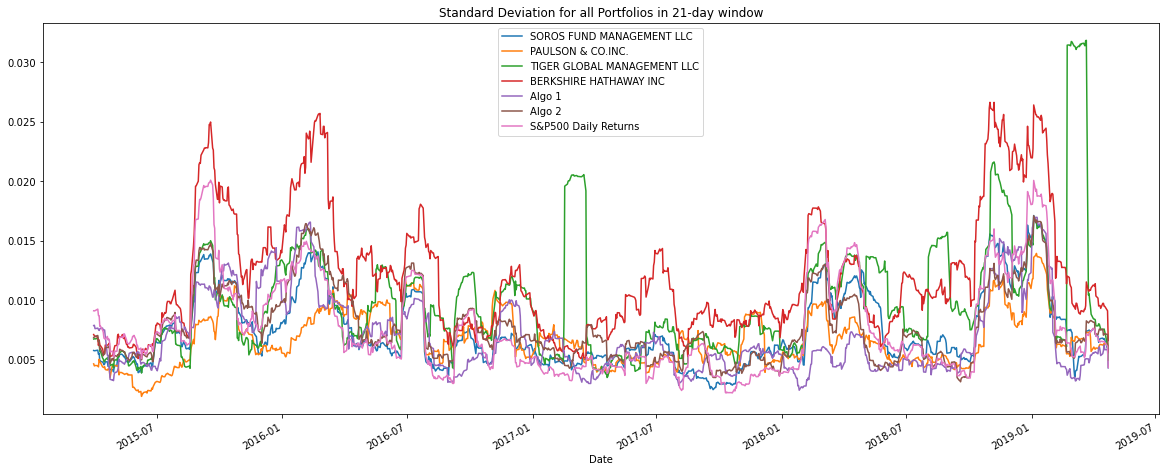

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
spy_21days_std = conc_portofolios_returns.rolling(window=21).std()
# Plot the rolling standard deviation
spy_21days_std.plot(title="Standard Deviation for all Portfolios in 21-day window", figsize=(20,8))

#ask if there should be all portfolios ploted or just sp500 "put [["S&P500 Daily Returns"]] if only sp500"

### Calculate and plot the correlation

<AxesSubplot:xlabel='Algo 2', ylabel='S&P500 Daily Returns'>

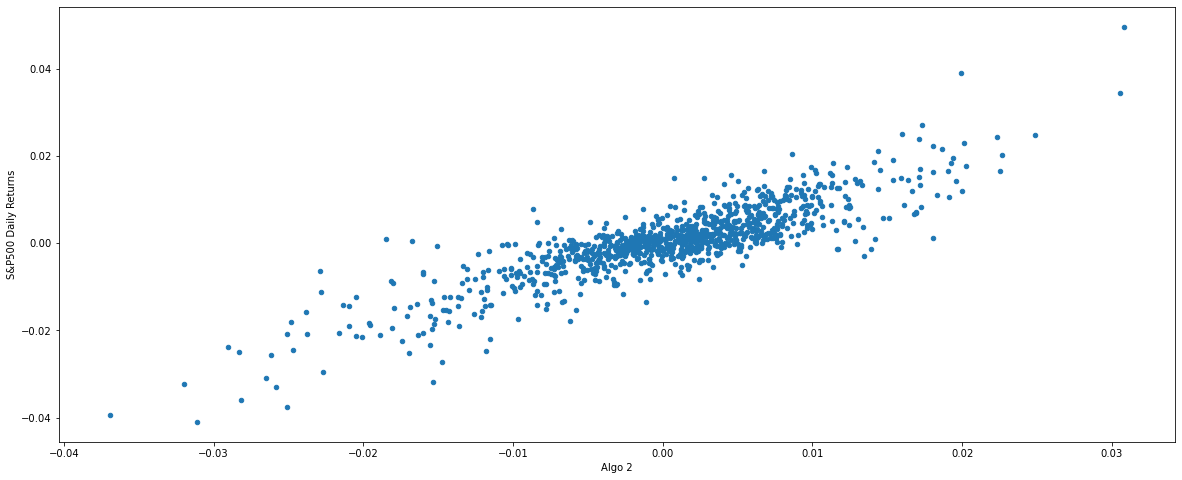

In [22]:
# Calculate the correlation
correlation_spy = pd.DataFrame(conc_portofolios_returns.corr()).loc[:,"S&P500 Daily Returns"]
correlation_spy[correlation_spy == correlation_spy[correlation_spy < 1 ].max()]

# Because Algo 2 has a correlation of 0.858764 which is very close to that of SP500 
# I think it mimics and behaves similar to SP500! Lets see if that is true!!?? Looks bad ~ I have to move one...

# Display the correlation matrix:
conc_portofolios_returns.plot(kind="scatter", x="Algo 2", y="S&P500 Daily Returns", figsize=(20,8),)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta of TIGER GLOBAL MANAGEMENT LLC in 60 day window'}, xlabel='Date'>

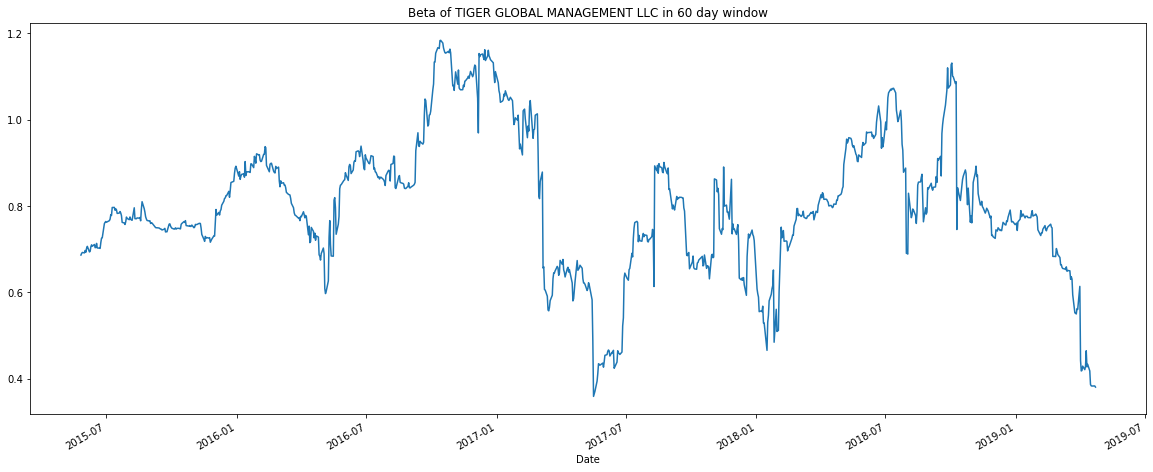

In [23]:
# Calculate covariance of a single portfolio
roll_covariance = conc_portofolios_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(conc_portofolios_returns["S&P500 Daily Returns"])
# Calculate variance of S&P 500
roll_variance = conc_portofolios_returns["S&P500 Daily Returns"].rolling(window=60).var()
# Computing beta
roll_beta = roll_covariance / roll_variance
# Plot beta trend
roll_beta.plot(title="Beta of TIGER GLOBAL MANAGEMENT LLC in 60 day window", figsize=(20,8))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

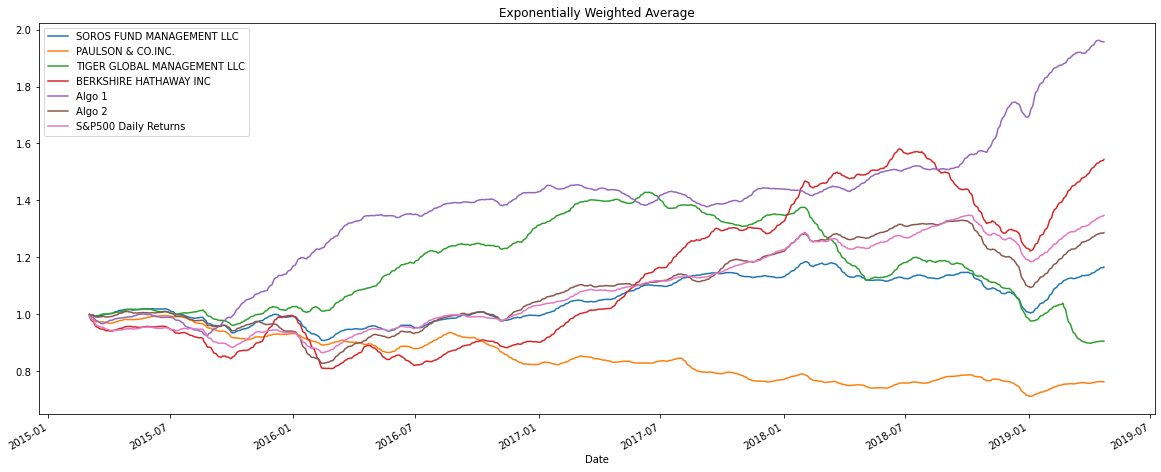

In [24]:
# Use `ewm` to calculate the rolling window
portofolios_return_ewm = conc_portofolios_returns.ewm(span = 21, adjust=False).mean()
(1 + portofolios_return_ewm).cumprod().plot(title = "Exponentially Weighted Average", figsize=(20,8))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratio = conc_portofolios_returns.mean()*252 / (conc_portofolios_returns.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500 Daily Returns           0.648267
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

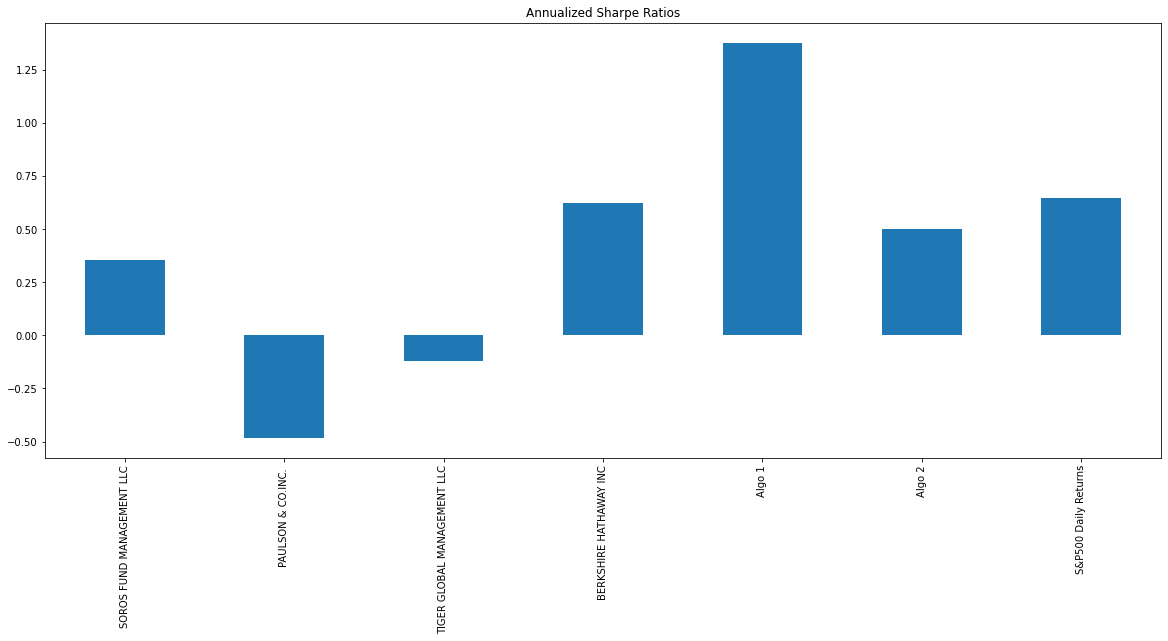

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(title="Annualized Sharpe Ratios",figsize=(20,8), kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
amc_path = Path("Resources/Resources_of_Personal_Portfolio/AMC.csv")
amc_df = pd.read_csv(amc_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
amc_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,7.300000,7.560000,7.230000,7.460000,7.414512,4545900
2020-01-03,7.450000,7.600000,7.310000,7.320000,7.275366,2218000
2020-01-06,7.250000,7.300000,7.110000,7.120000,7.076585,2903400
2020-01-07,7.110000,7.200000,7.000000,7.130000,7.086524,3205300
2020-01-08,7.110000,7.150000,6.610000,6.620000,6.579634,6557000
...,...,...,...,...,...,...
2022-03-25,19.950001,21.700001,19.709999,20.240000,20.240000,71814700
2022-03-28,20.610001,29.730000,20.530001,29.330000,29.330000,226704100
2022-03-29,30.030001,34.330002,26.410000,29.440001,29.440001,212293100


In [28]:
# Reading data from 2nd stock
doge_path = Path("Resources/Resources_of_Personal_Portfolio/DOGE-USD.csv")
doge_df = pd.read_csv(doge_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
doge_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,0.002028,0.002052,0.002021,0.002033,0.002033,51180941
2020-01-02,0.002034,0.002110,0.001983,0.002009,0.002009,65071106
2020-01-03,0.002008,0.002177,0.001991,0.002145,0.002145,62619988
2020-01-04,0.002144,0.002490,0.002050,0.002241,0.002241,94227582
2020-01-05,0.002240,0.002491,0.002117,0.002419,0.002419,52631740
...,...,...,...,...,...,...
2022-03-28,0.144725,0.152737,0.142457,0.142657,0.142657,1476875507
2022-03-29,0.142557,0.148559,0.141290,0.144470,0.144470,961074557
2022-03-30,0.144456,0.144997,0.139880,0.143210,0.143210,884305263


In [29]:
# Reading data from 3rd stock
gme_path = Path("Resources/Resources_of_Personal_Portfolio/GME.csv")
gme_df = pd.read_csv(gme_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
gme_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6.140000,6.470000,6.070000,6.310000,6.310000,4453600
2020-01-03,6.210000,6.250000,5.840000,5.880000,5.880000,3543900
2020-01-06,5.800000,5.910000,5.600000,5.850000,5.850000,3394800
2020-01-07,5.770000,5.830000,5.440000,5.520000,5.520000,5228000
2020-01-08,5.490000,5.850000,5.410000,5.720000,5.720000,5629400
...,...,...,...,...,...,...
2022-03-25,140.039993,158.160004,138.199997,151.949997,151.949997,13383900
2022-03-28,151.979996,190.839996,151.539993,189.589996,189.589996,16316500
2022-03-29,188.240005,199.410004,163.000000,179.899994,179.899994,18011500


In [30]:
# Combine all stocks in a single DataFrame
devs_portfolio = pd.concat([amc_df, doge_df, gme_df], axis="columns", join="inner")
devs_portfolio.sort_index(ascending=True, inplace=True)
devs_portfolio

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,
2020-01-02,7.300000,7.560000,7.230000,7.460000,7.414512,4545900,0.002034,0.002110,0.001983,0.002009,0.002009,65071106,6.140000,6.470000,6.070000,6.310000,6.310000,4453600
2020-01-03,7.450000,7.600000,7.310000,7.320000,7.275366,2218000,0.002008,0.002177,0.001991,0.002145,0.002145,62619988,6.210000,6.250000,5.840000,5.880000,5.880000,3543900
2020-01-06,7.250000,7.300000,7.110000,7.120000,7.076585,2903400,0.002418,0.002564,0.002379,0.002463,0.002463,54562409,5.800000,5.910000,5.600000,5.850000,5.850000,3394800
2020-01-07,7.110000,7.200000,7.000000,7.130000,7.086524,3205300,0.002485,0.002497,0.002354,0.002433,0.002433,52767343,5.770000,5.830000,5.440000,5.520000,5.520000,5228000
2020-01-08,7.110000,7.150000,6.610000,6.620000,6.579634,6557000,0.002433,0.002465,0.002265,0.002293,0.002293,77251526,5.490000,5.850000,5.410000,5.720000,5.720000,5629400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,19.950001,21.700001,19.709999,20.240000,20.240000,71814700,0.136603,0.137275,0.128782,0.131013,0.131013,882486375,140.039993,158.160004,138.199997,151.949997,151.949997,13383900
2022-03-28,20.610001,29.730000,20.530001,29.330000,29.330000,226704100,0.144725,0.152737,0.142457,0.142657,0.142657,1476875507,151.979996,190.839996,151.539993,189.589996,189.589996,16316500
2022-03-29,30.030001,34.330002,26.410000,29.440001,29.440001,212293100,0.142557,0.148559,0.141290,0.144470,0.144470,961074557,188.240005,199.410004,163.000000,179.899994,179.899994,18011500


In [31]:
# Clean data and remove the unnecessary columns
devs_portfolio = devs_portfolio.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
devs_portfolio


,Close,Close,Close
Date,,,
2020-01-02,7.460000,0.002009,6.310000
2020-01-03,7.320000,0.002145,5.880000
2020-01-06,7.120000,0.002463,5.850000
2020-01-07,7.130000,0.002433,5.520000
2020-01-08,6.620000,0.002293,5.720000
...,...,...,...
2022-03-25,20.240000,0.131013,151.949997
2022-03-28,29.330000,0.142657,189.589996
2022-03-29,29.440001,0.144470,179.899994


In [32]:
# Reorganize portfolio data by having a column per symbol
devs_portfolio.columns=["AMC", "DOGE-USD", "GME"]
devs_portfolio


,AMC,DOGE-USD,GME
Date,,,
2020-01-02,7.460000,0.002009,6.310000
2020-01-03,7.320000,0.002145,5.880000
2020-01-06,7.120000,0.002463,5.850000
2020-01-07,7.130000,0.002433,5.520000
2020-01-08,6.620000,0.002293,5.720000
...,...,...,...
2022-03-25,20.240000,0.131013,151.949997
2022-03-28,29.330000,0.142657,189.589996
2022-03-29,29.440001,0.144470,179.899994


In [51]:
# Calculate daily returns
devpo_daily_returns = devs_portfolio.pct_change()

# Drop NAs
devpo_daily_returns.dropna(inplace=True)
# Display sample data
devpo_daily_returns.head()

,AMC,DOGE-USD,GME
Date,,,
2020-01-03,-0.018767,0.067695,-0.068146
2020-01-06,-0.027322,0.148252,-0.005102
2020-01-07,0.001404,-0.012180,-0.056410
2020-01-08,-0.071529,-0.057542,0.036232
2020-01-09,-0.024169,-0.016136,-0.029720


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [38]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [40]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios


In [42]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!